analytic_solutions_irregular_matching
MAE: 0.6005557973465971
RMSE: 0.8094470237152479
 
-0.5587 x + 0.5947
MAE: 0.6342156769043661
RMSE: 0.8271257311203936
          2
-0.03396 x - 0.4908 x + 0.5725
MAE: 0.634215676904303
RMSE: 0.8271257311203493
        3       2
-1.545 x + 4.6 x - 4.161 x + 1.153
MAE: 0.9887691776182268
RMSE: 1.095048109261206
        4         3         2
0.6927 x - 4.316 x + 8.139 x - 5.697 x + 1.293
MAE: 0.9887691775706562
RMSE: 1.0950481092196889
       5         4         3         2
16.08 x - 79.71 x + 137.9 x - 97.02 x + 23.18 x - 0.3615
MAE: 1.0312045791351274
RMSE: 1.1327923284528807
         6         5        4         3         2
-0.2642 x + 17.67 x - 83.3 x + 141.7 x - 98.87 x + 23.53 x - 0.3748
MAE: 1.0312045103014236
RMSE: 1.132792266117377
        7         6         5         4         3         2
-26.09 x + 182.3 x - 486.5 x + 611.6 x - 355.6 x + 74.25 x - 0.1481 x + 0.2463
MAE: 1.339558943946019
RMSE: 1.4398080771762867
       8         7         

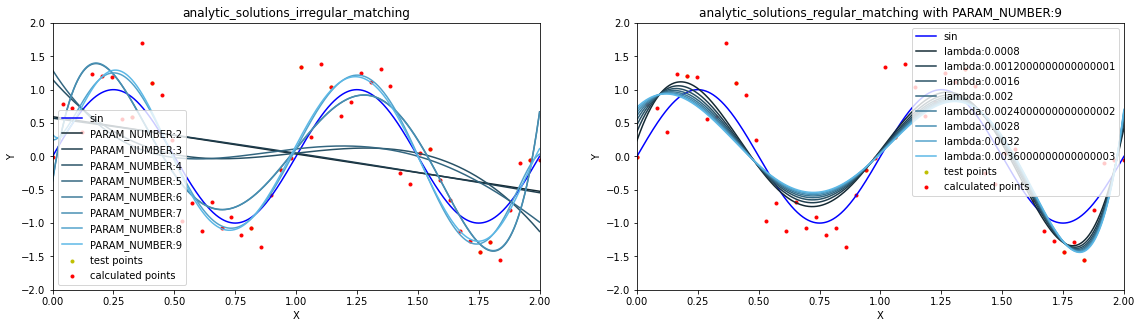

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 测试点区间
TEST_START = 1
TEST_END = 2

# 正则项惩罚参数
LAMBDA = 0.0004

# 计算点区间
CALCULATE_START = 0
CALCULATE_END = 2

# 参数维度
PARAM_NUMBER = 9

# 样本点数
SAMPLE_NUMBER = 50

# 测试点数
TEST_POINTS_NUMBERS = 10

# 梯度下降系列参数
LOOP_MAX = 10000
EPSILON = 0.8
ALPHA = 0.2


def random_point(start, end, a):
    """
    样本点生成函数 通过定义生成区间和生成个数 返回样本点矩阵
    :param start: 正数 必须小于end
    :param end: 正数 必须大雨start
    :param a: 样本点个数 必须是正整数
    :return: 返回2*N的样本点矩阵
    """
    array_x = np.linspace(start, end, a)
    # array_y0 = np.sin(2 * np.pi * array_x) + np.random.randn(a)
    array_y0 = np.sin(2 * np.pi * array_x) + np.random.normal(scale=0.5, size=array_x.shape)


    result = np.vstack((np.mat(array_x), np.mat(array_y0)))
    dataframe = pd.DataFrame({'x':array_x,'sin(x)':array_y0})
    dataframe.to_csv("D1.csv",index=False,sep=',')    
    # print("result:")
    # print(result)
    return result

    # figure = plt.figure()
    # ax = figure.add_subplot(111)
    #
    # ax.set_title("Figure1")
    #
    # plt.xlabel("X")
    # plt.ylabel("Y")
    #
    # plt.legend("x1")
    #
    # ax.scatter(array_x, array_y0, c="r", marker=".")


def random_point_test(start, end, a):
    """
    测试点生成函数 通过定义测试区间生成a个数据点进行测试
    :param start: 正数 必须小于end
    :param end: 正数 必须大雨start
    :param a: 生成样本点数量 必须为正整数
    :return: 返回2*N的数据点矩阵
    """
    df = pd.read_csv('D1.csv')
    xArr = df.iloc[:,0].values
    yArr = df.iloc[:,1].values
    x_train, x_test, y_train, y_test = train_test_split(xArr, yArr, test_size=0.2)
    train= np.column_stack((x_train,y_train))
    np.savetxt('D1_train.csv',train, delimiter = ',')

    test = np.column_stack((x_test, y_test))
    np.savetxt('D1_test.csv', test, delimiter = ',')
    ''''''
    result = np.vstack((np.mat(x_test), np.mat(y_test)))
    return result


def analytic_solutions_regular_matching(a, result):

    """
    解析解的有正则计算函数 通过现有的公式进行计算 得出未经过调整的参数结果
    :param a: 参数为最终计算的列矩阵维度 必须为大于1的正整数
    :param result: 样本点矩阵 必须是2*N维度
    :return: 返回参数列矩阵
    """
    size = SAMPLE_NUMBER
    x = np.transpose(result[0])
    y = np.transpose(result[1])
    X = np.ones((size, 1))
    for i in range(1, a):
        X = np.hstack((X, np.power(x, i)))
    Xt = np.transpose(X)
    i = np.eye(a)
    W = (Xt * X + LAMBDA * i).I * Xt * y
    return W


def analytic_solutions_irregular_matching(a, result):

    """
    解析解的无正则计算函数 通过现有的公式进行计算 得出未经过调整的参数结果
    :param a: 参数为最终计算的列矩阵维度 必须为大于1的正整数
    :param result: 样本点矩阵 必须是2*N维度
    :return: 返回参数列矩阵
    """
    size = SAMPLE_NUMBER
    x = np.transpose(result[0])
    y = np.transpose(result[1])
    X = np.ones((size, 1))
    for i in range(1, a):
        X = np.hstack((X, np.power(x, i)))
    Xt = np.transpose(X)
    W = (Xt * X).I * Xt * y
    return W


def conjugate_gradient(a, result):
    size = SAMPLE_NUMBER
    x = np.transpose(result[0])
    y = np.transpose(result[1])
    X = np.ones((size, 1))
    for i in range(1, a):
        X = np.hstack((X, np.power(x, i)))

    x0 = np.ones((a, 1))
    k = np.eye(a)
    A = X.T * X + LAMBDA * k
    b = X.T * y
    count = 0
    r0 = b - np.dot(A, x0)
    p0 = r0
    # test1 = np.dot(r0.T, r0)
    # test2 = p0.T * X * p0
    while count < 1000:
        alpha0 = np.dot(r0.T, r0) / (p0.T * A * p0)
        x1 = x0 + alpha0.tolist()[0][0] * p0
        r1 = r0 - alpha0.tolist()[0][0] * A * p0
        if np.linalg.norm(r1) < 1e-6:
            print("count:", count)
            print(x1)
            return x1
        beta0 = np.dot(r1.T, r1) / np.dot(r0.T, r0)
        p1 = r1 + beta0.tolist()[0][0] * p0
        x0 = x1
        p0 = p1
        r0 = r1
        count += 1
    print("count:", count)
    return x0


def pre_draw(ax, result):
    plt.xlim(0, 2)
    plt.ylim(-2, 2)
    x0 = np.linspace(CALCULATE_START, TEST_END, 2000)
    y1 = np.sin(2 * np.pi * x0)

    plt.xlabel("X")
    plt.ylabel("Y")

    test = random_point_test(TEST_START, TEST_END, TEST_POINTS_NUMBERS)

    ax.scatter(test[0].tolist(), test[1].tolist(), label="test points", c="y", marker=".")
    ax.scatter(result[0].tolist(), result[1].tolist(), label="calculated points", c="r", marker=".")
    ax.plot(x0, y1, label="sin", color="blue")
    plt.legend()


def draw(s, w, ax, label, color):
    """
    画图函数 已经封装了所有的可能结果 通过传入的参数进行绘制并且会在图形中展示
    测试点和计算点
    :param s: 图标题
    :param ax: 画图的画布区域
    :param w: 计算得出的参数矩阵
    :param label: 图例
    :param color: 颜色算子
    :return: 无返回值 直接调用绘图
    """
    wt = np.transpose(w)
    l = list(reversed(wt.tolist()[0]))
    x0 = np.linspace(CALCULATE_START, TEST_END, 2000)
    y0 = np.poly1d(l)
    print(y0)

    ax.set_title(s)

    ax.plot(x0, y0(x0), label=label, color=[color * 0.04, color * 0.08, color * 0.1])
    plt.legend()

#定义MAE
def mae_value(y_true,y_pred):
    n = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred))/n
    return mae

#定义RMSE
def rmse_value(y_true, y_pred):
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    rmse = mse.sum()
    rmse = np.sqrt(rmse)
    return rmse   
    
def print_mae_rmse(y_true,y_pred):
    mae = mae_value(y_true,y_pred)
    print("MAE:",mae)
    rmse = rmse_value(y_true,y_pred)
    print("RMSE:",rmse)
    
def main():
    global PARAM_NUMBER, LAMBDA
    fig = plt.figure(figsize=(19.2, 10.8))
    result = random_point(CALCULATE_START, CALCULATE_END, SAMPLE_NUMBER)

    df1 = pd.read_csv('D1_test.csv')
    x_test = df1.iloc[:,0].values
    y_test = df1.iloc[:,1].values

    df2 = pd.read_csv('D1_train.csv')
    x_train = df2.iloc[:,0].values
    y_train = df2.iloc[:,1].values

    print("analytic_solutions_irregular_matching")
    ax1 = fig.add_subplot(221)
    pre_draw(ax1, result)
    
    for i in range(2, 10):
        PARAM_NUMBER = i
        w = analytic_solutions_irregular_matching(PARAM_NUMBER, result)
        pre_irregular = np.sum(w*x_test)
        print_mae_rmse(y_test,pre_irregular)
        MAE.append(mae_value(y_test,pre_irregular))
        RMSE.append(rmse_value(y_test,pre_irregular))
        draw("analytic_solutions_irregular_matching", w, ax1, "PARAM_NUMBER:" + str(PARAM_NUMBER), i)
    PARAM_NUMBER = 9

    print("analytic_solutions_regular_matching with PARAM_NUMBER:" + str(PARAM_NUMBER))
    ax2 = fig.add_subplot(222)
    pre_draw(ax2, result)
    
    print("\n\n")
    for i in range(2, 10):
        LAMBDA = i * 0.0004
        w = analytic_solutions_regular_matching(PARAM_NUMBER, result)
        pre_regular = np.sum(w*x_test)
        print_mae_rmse(y_test,pre_irregular)
        draw("analytic_solutions_regular_matching with PARAM_NUMBER:" + str(PARAM_NUMBER), w, ax2, "lambda:" + str(LAMBDA), i)
        
        
    
    plt.show()


if __name__ == "__main__":
    main()

Text(0.5, 1.0, 'MAE')

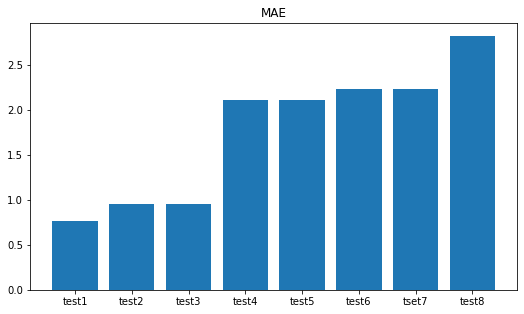

In [88]:
MAE = []
RMSE = []
result = random_point(CALCULATE_START, CALCULATE_END, SAMPLE_NUMBER)
df1 = pd.read_csv('D1_test.csv')
x_test = df1.iloc[:,0].values
y_test = df1.iloc[:,1].values

df2 = pd.read_csv('D1_train.csv')
x_train = df2.iloc[:,0].values
y_train = df2.iloc[:,1].values
fig = plt.figure(figsize=(19.2, 10.8))
ax1 = fig.add_subplot(221)
for i in range(2, 10):
    PARAM_NUMBER = i
    w = analytic_solutions_irregular_matching(PARAM_NUMBER, result)
    pre_irregular = np.sum(w*x_test)
    MAE.append(mae_value(y_test,pre_irregular))

labels = ('test1', 'test2', 'test3', 'test4', 'test5','test6','tset7','test8')
plt.bar(labels,MAE)
plt.title('MAE')

<BarContainer object of 8 artists>

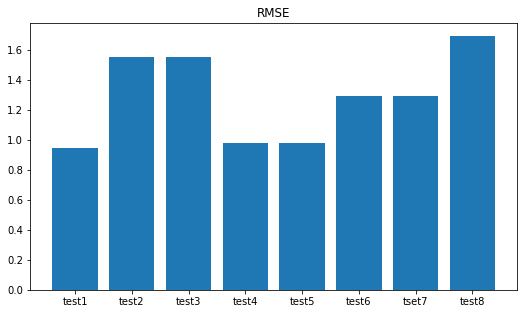

In [91]:
MAE = []
RMSE = []
result = random_point(CALCULATE_START, CALCULATE_END, SAMPLE_NUMBER)
df1 = pd.read_csv('D1_test.csv')
x_test = df1.iloc[:,0].values
y_test = df1.iloc[:,1].values

df2 = pd.read_csv('D1_train.csv')
x_train = df2.iloc[:,0].values
y_train = df2.iloc[:,1].values
fig = plt.figure(figsize=(19.2, 10.8))
ax1 = fig.add_subplot(221)
for i in range(2, 10):
    PARAM_NUMBER = i
    w = analytic_solutions_irregular_matching(PARAM_NUMBER, result)
    pre_irregular = np.sum(w*x_test)
    RMSE.append(rmse_value(y_test,pre_irregular))

labels = ('test1', 'test2', 'test3', 'test4', 'test5','test6','tset7','test8')
plt.title("RMSE")
plt.bar(labels,RMSE)